<a href="https://colab.research.google.com/github/Knell999/ML_Ops_HK-Toss/blob/main/Chapter_1_%EA%B8%B0%EC%B4%88/02_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%8F%84%EA%B5%AC/01_%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B8%B0%EB%B0%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%8F%84%EA%B5%AC/14_%5BPandas%5D_%EB%B6%80%EB%8F%99%EC%82%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install -y fonts-nanum
!rm ~/.cache/matplotlib -rf

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd
df = pd.read_csv('./data/house_price_clean.csv')
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      3293 non-null   object
 1   규모      3293 non-null   object
 2   연도      3293 non-null   int64 
 3   월       3293 non-null   int64 
 4   분양가     3293 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 128.8+ KB


# 무작정 시각화 하기

<Axes: >

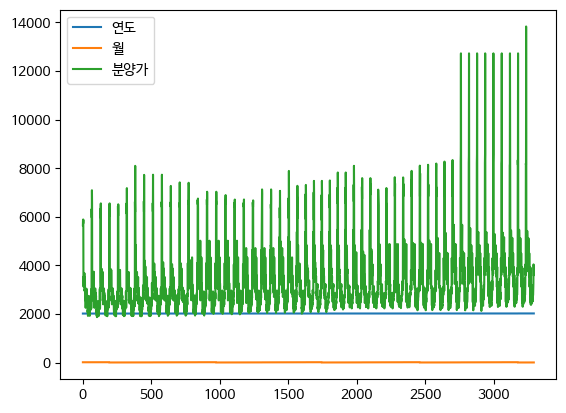

In [5]:
df.plot()

<Axes: >

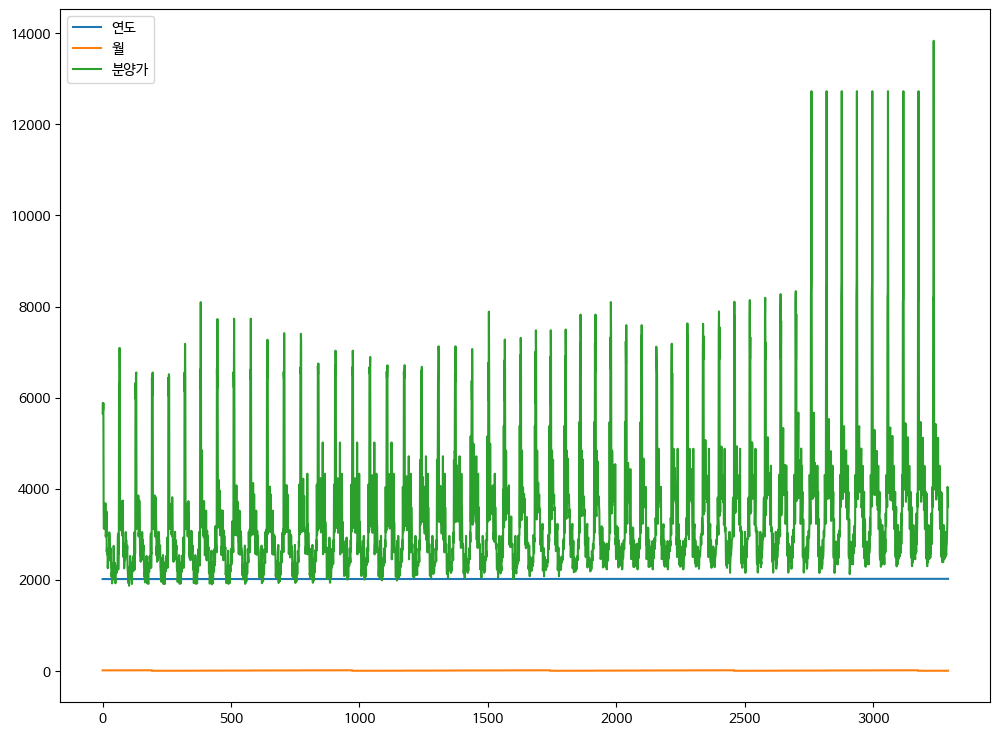

In [6]:
plt.rcParams["figure.figsize"] = (12, 9)
df.plot()

# Pandas 기반 시각화

## 1. Plot 그래프

plot은 일반 선 그래프를 의미

kind 옵션을 이용해서 원하는 그래프를 그릴 수 있다.
* **line : 선 그래프**
* **bar  : 바 그래프 (수직 바)**
* **barh : 수평 바 그래프 (수평 바)**
* **hist : 히스토그램**
* kde  : 커널 밀도 그래프
* hexbin : 고밀도 산점도 그래프
* **box : 박스 플롯**
* area : 면적 그래프
* pie : 파이 그래프
* **scatter : 산점도 그래프**

### line 그래프
* line 그래프는 데이터가 연속적인 특징을 띄고 있을 때 사용하기 좋다
  * 주가 데이터
  * 시간에 따른 아파트 분양 데이터 등

<Axes: >

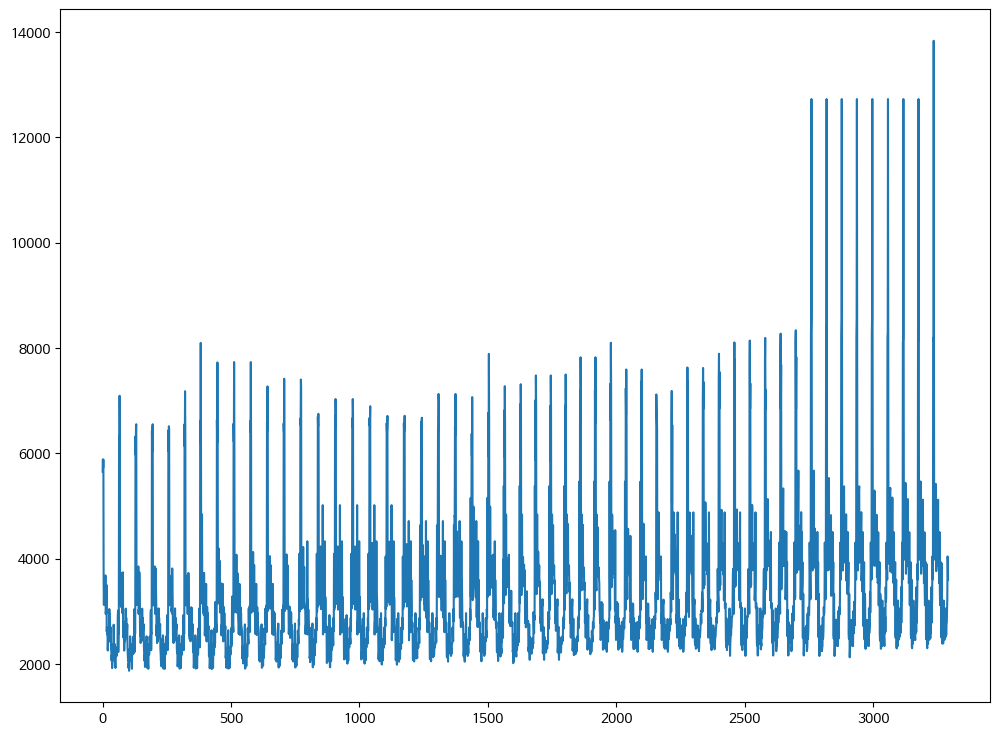

In [7]:
# x축을 따로 지정하지 않으면 데이터 프레임의 인덱스가 x축이 된다.
df['분양가'].plot(kind='line')

서울시의 연도별 분양가 평균을 시각화

In [8]:
# 1. 서울 지역의 데이터 뽑기
df_seoul = df.loc[df['지역'] == '서울']
df_seoul.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320


In [9]:
df_seoul.tail()

,지역,규모,연도,월,분양가
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835
3237,서울,102㎡초과,2020,2,9039


In [10]:
# 2. 연도별 분양가 평균
df_seoul_year = df_seoul.groupby("연도")["분양가"].mean()
df_seoul_year

,분양가
연도,
2015,6201.000000
2016,6674.520833
2017,6658.729167
2018,7054.687500
2019,8735.083333
2020,9647.375000


<Axes: xlabel='연도'>

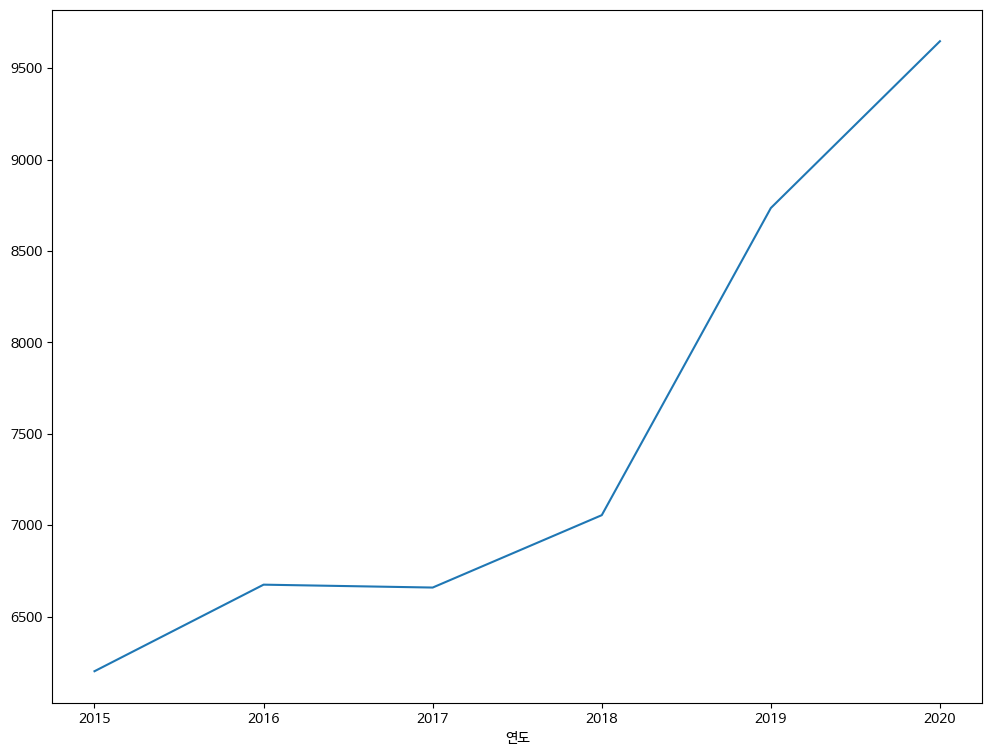

In [11]:
df_seoul_year.plot(kind='line')

### bar 그래프
bar 그래프는 그룹별(카테고리별)로 비교할 때 유용

In [12]:
# 지역별 분양가 평균
local_mean = df.groupby("지역")['분양가'].mean()
local_mean

,분양가
지역,
강원,2448.156863
경기,4133.952830
경남,2858.932367
경북,2570.465000
광주,3055.043750
대구,3679.620690
대전,3176.127389
부산,3691.981132
서울,7308.943396


<Axes: xlabel='지역'>

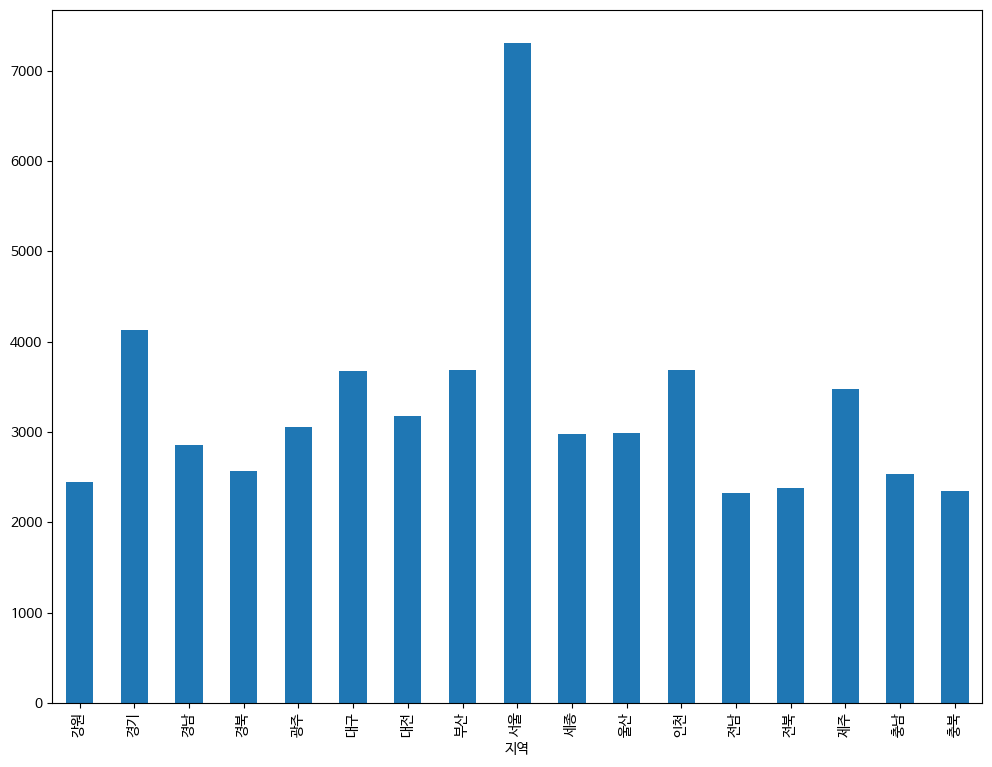

In [13]:
local_mean.plot(kind='bar')

<Axes: xlabel='지역'>

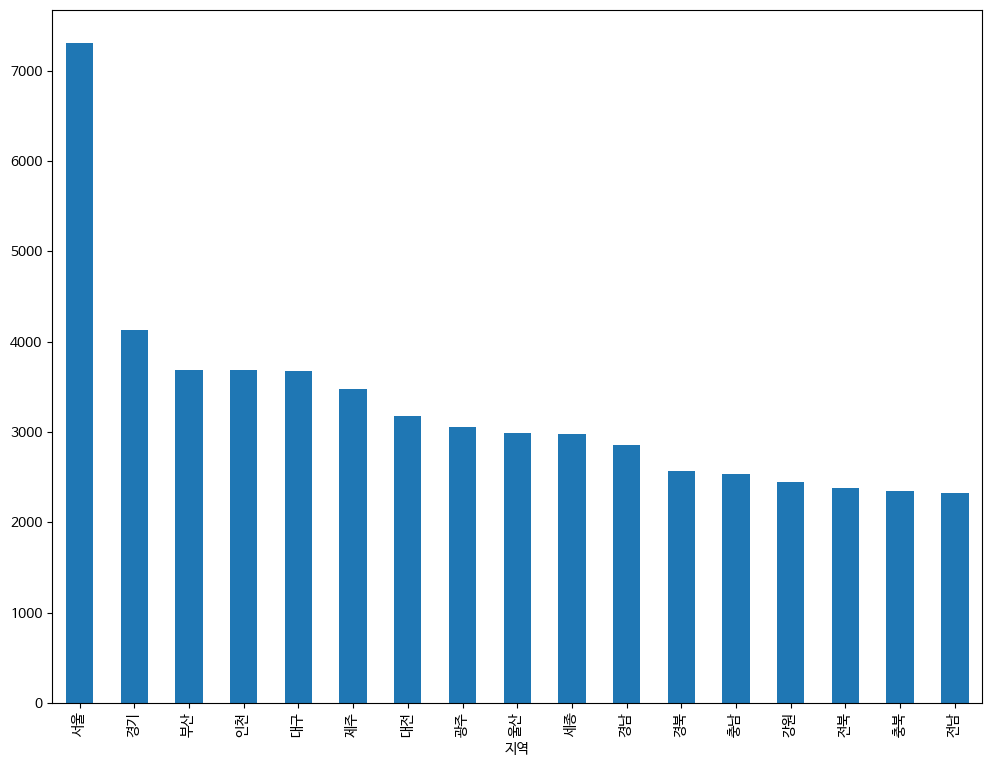

In [14]:
# 정렬해서 시각화 (분양가 내림차순 정렬)
local_mean_sorted = local_mean.sort_values(ascending=False)
local_mean_sorted.plot(kind='bar')

<Axes: ylabel='지역'>

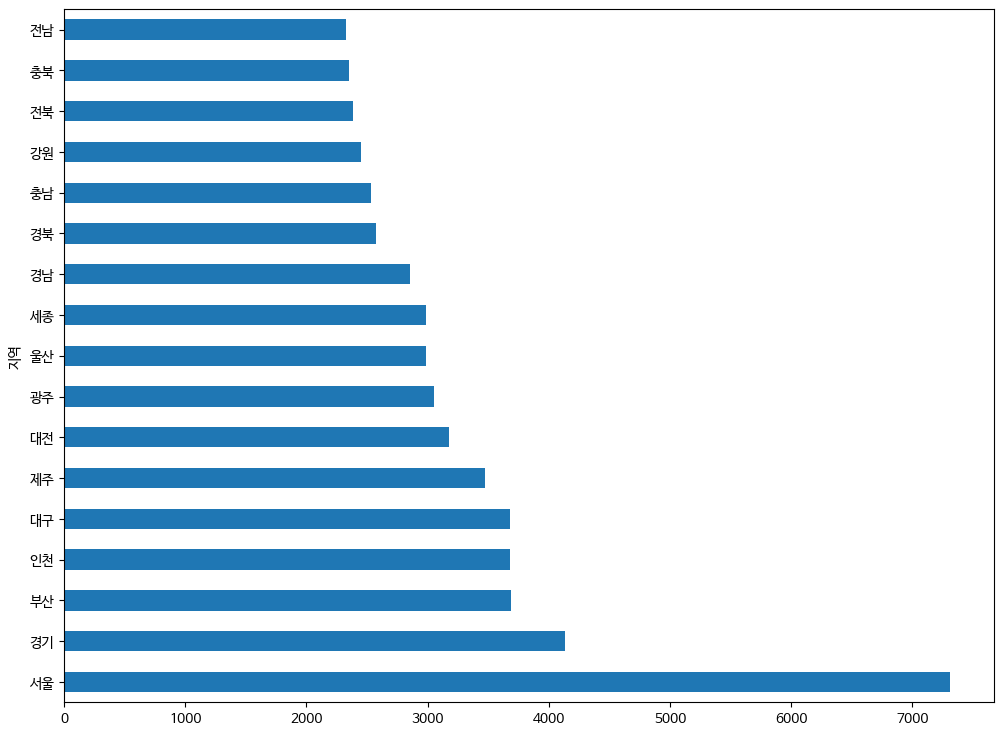

In [15]:
local_mean_sorted.plot(kind='barh') # barh : bar horizontal(수평 바)

### 히스토그램(hist)
히스토그램은 **구간-빈도를 시각화 해서** 보여줍니다.
* 가로축에는 구간
* 세로축에는 빈도

<Axes: ylabel='Frequency'>

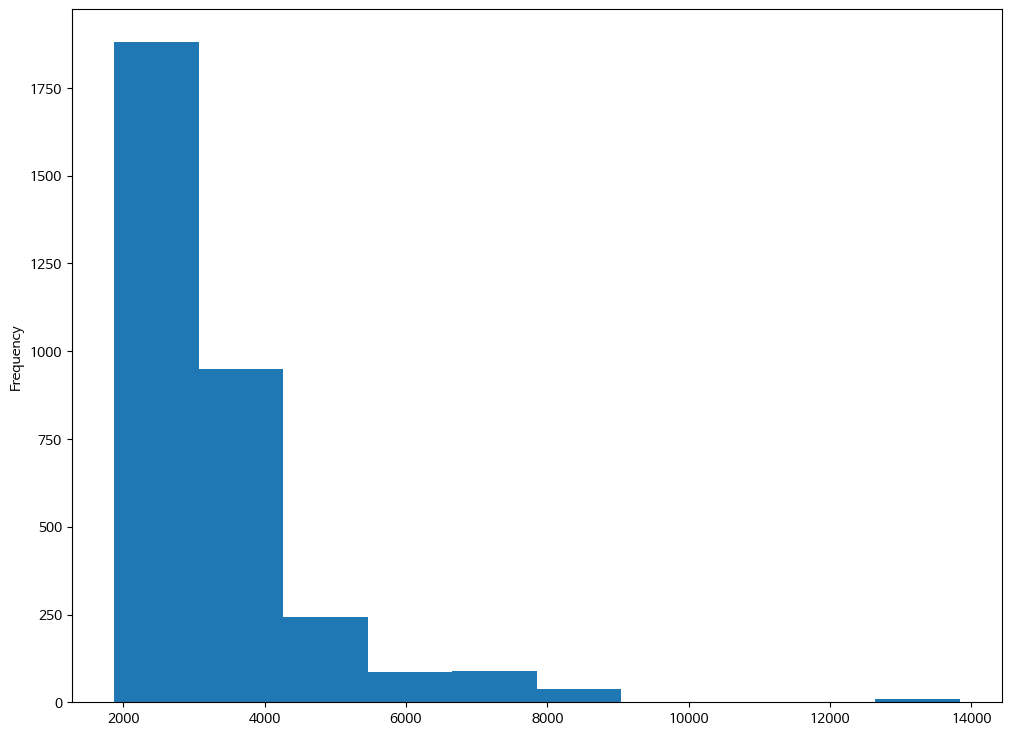

In [16]:
# 분양가 히스토그램
df['분양가'].plot(kind='hist')

### 커널 밀도 그래프
* 히스토그램과 유사하게 밀도를 보여주는 그래프
* 히스토그램과 유사한 모양새를 갖추고 있다.
* 부드러운 라인을 가지고 있다.

<Axes: ylabel='Density'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


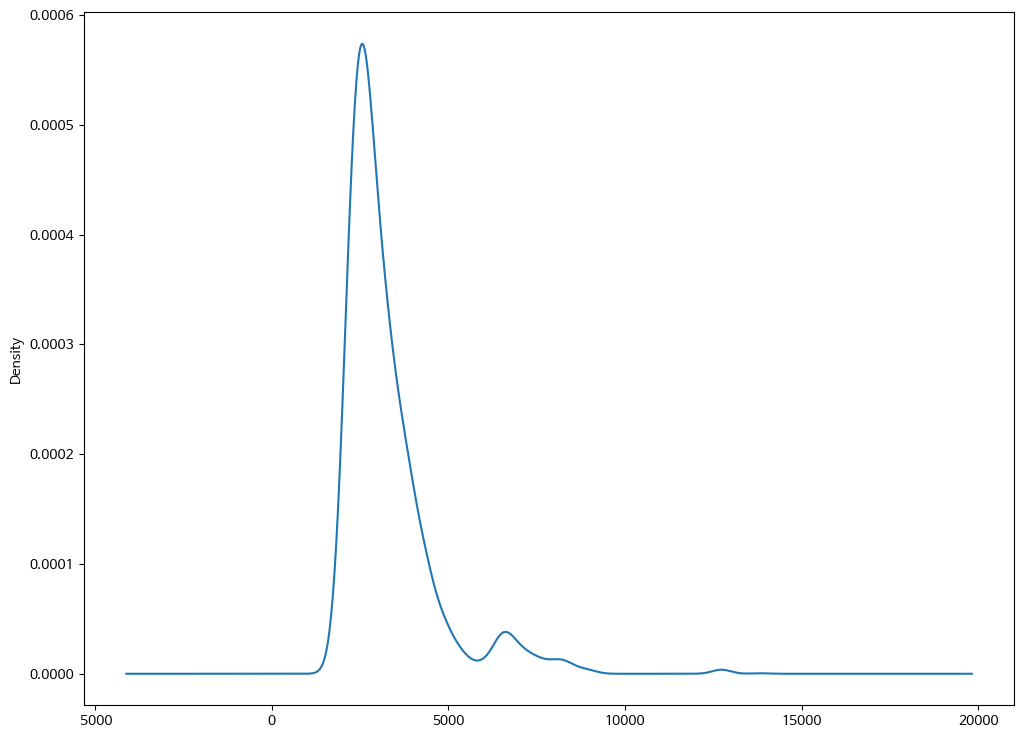

In [17]:
df['분양가'].plot(kind='kde')

확률 밀도 함수 (Probablity Density Function - PDF)
$$
P(a\leq x \leq b) = \int_{a}^{b}f(x)dx
$$

커널 밀도 추정( Kernel Density Estimation )
$$
\int_{-\infty}^{\infty}K(u)du=1
$$
$$
K(u)=K(-u), K(u) \geq 0
$$

KDE에서의 확률 밀도 함수 추정

$$
\hat{f}_h(x)=\frac{1}{n}\sum_{i=1}^{n}K_h(x-x_i)=\frac{1}{nh}\sum_{i=1}^{n}K \left ( \frac{x-x_i}{h} \right )
$$

$h$는 커널 함수의 bandwidth 파라미터로써, 커널의 뾰족한 형태를 조절하는 파라미터. 계산 편의상 가우시안 커널함수 사용
$$
h=\left (\frac{4\sigma^5}{3n} \right )^{\frac{1}{5}} \approx 1.06\sigma n^{-1/5}
$$

### Hexbin
* hexbin은 고밀도 산점도 그래프
* x와 y 키값을 모두 넣어줘야 한다.
* x, y값 모두 numeric한 값( 수치 데이터 )이어야 합니다.
* 데이터의 밀도를 추정

<Axes: xlabel='분양가', ylabel='연도'>

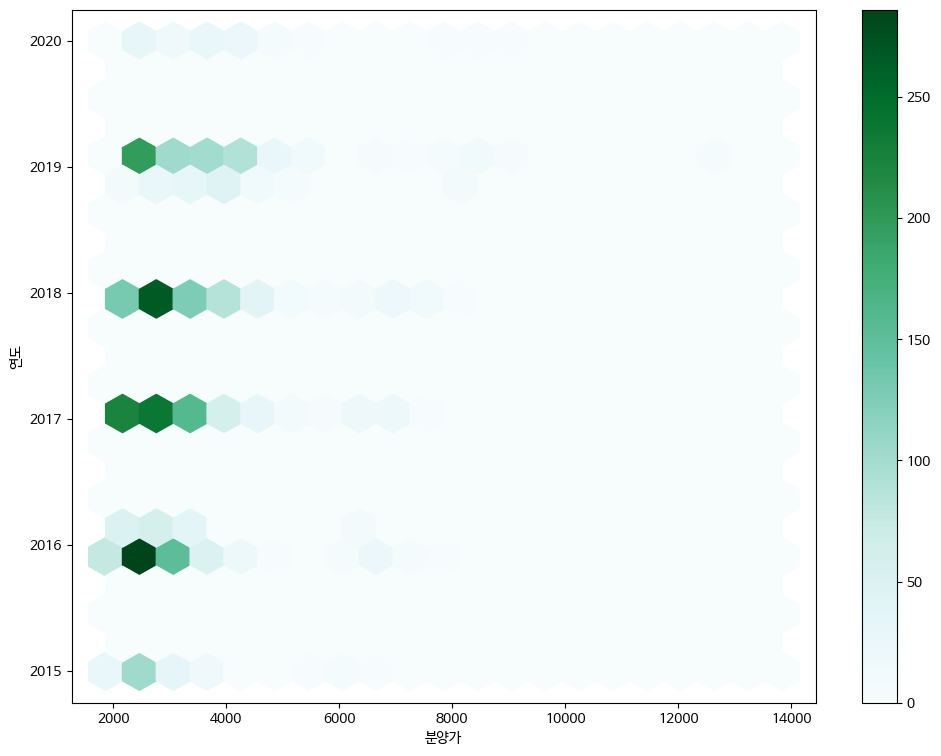

In [18]:
df.plot(kind='hexbin', x='분양가', y='연도', gridsize=20)

### 박스 플롯(box)
* 데이터의 최대, 최소, 평균, 중간값 등 집계된 정보를 한눈에 볼 수 있게 정리 해 주는 시각화 기법
* 이상치 판단도 쉽게 가능하다.

<Axes: >

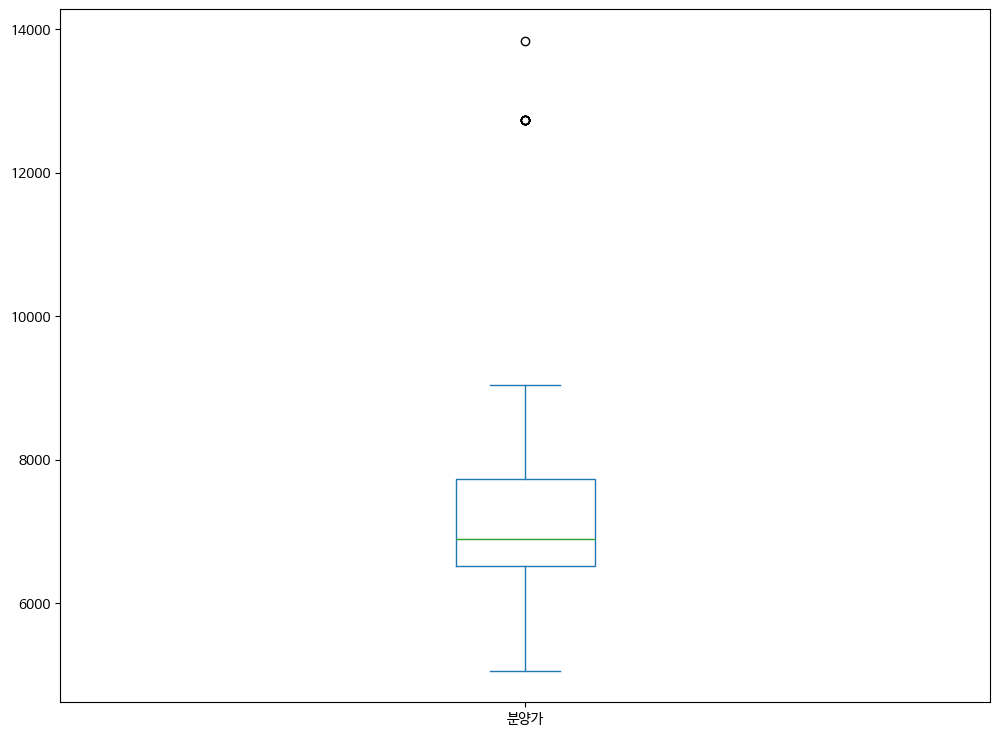

In [19]:
df_seoul["분양가"].plot(kind='box')

![Boxplot](https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png)

In [20]:
df_seoul.describe()

,연도,월,분양가
count,212.00000,212.000000,212.000000
mean,2017.45283,6.566038,7308.943396
std,1.31439,3.603629,1402.869496
min,2015.00000,1.000000,5061.000000
25%,2016.00000,3.000000,6519.750000
50%,2017.00000,7.000000,6895.500000
75%,2019.00000,10.000000,7732.000000
max,2020.00000,12.000000,13835.000000


[참고] IQR(Inter Quantile Range)
$$
3Q-1Q x 1.5
$$

In [23]:
Q3 = 7732
Q1 = 6519.75

IQR = (Q3 - Q1) * 1.5
IQR

1818.375

In [24]:
# BOX Plot의 Upper Whicker 까지의 범위
Q3 + IQR

9550.375

In [25]:
Q1 - IQR

4701.375

### area plot

line 그래프에서 아래 영역(area)를 색칠해 주는 것이 특징

In [26]:
price_by_month_count = df.groupby("월")["분양가"].count()

In [27]:
price_by_month_count

,분양가
월,
1,308
2,307
3,246
4,251
5,251
6,250
7,248
8,248
9,248


<Axes: xlabel='월'>

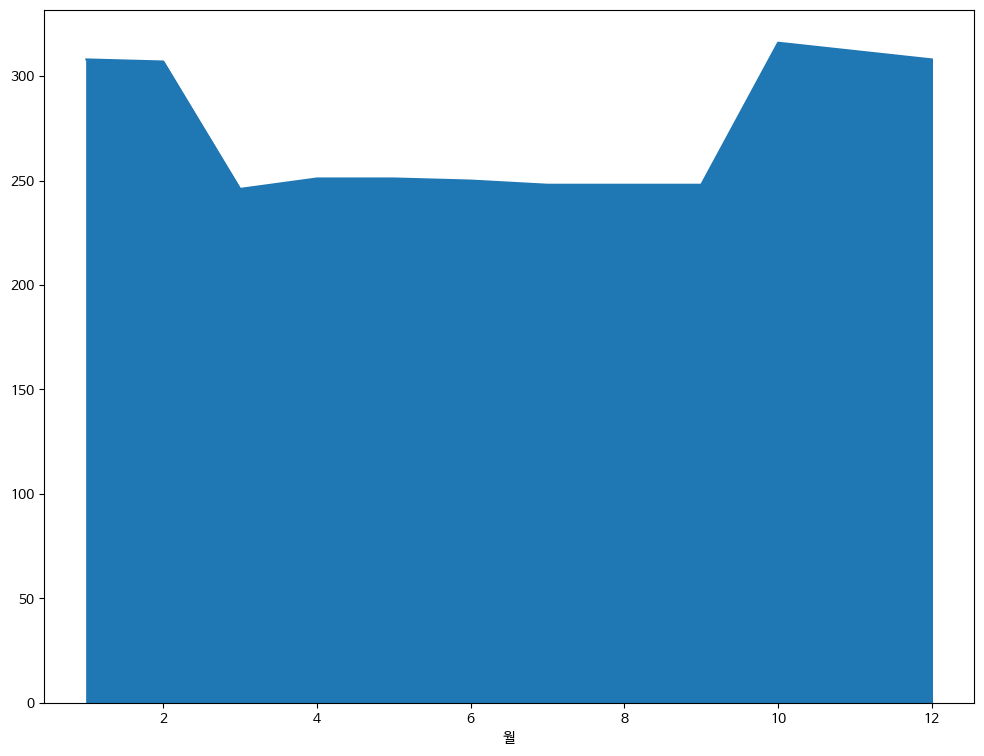

In [28]:
price_by_month_count.plot(kind="area")

In [29]:
price_by_year = df.groupby("연도")["분양가"].count()
price_by_year

,분양가
연도,
2015,192
2016,780
2017,771
2018,716
2019,716
2020,118


<Axes: ylabel='분양가'>

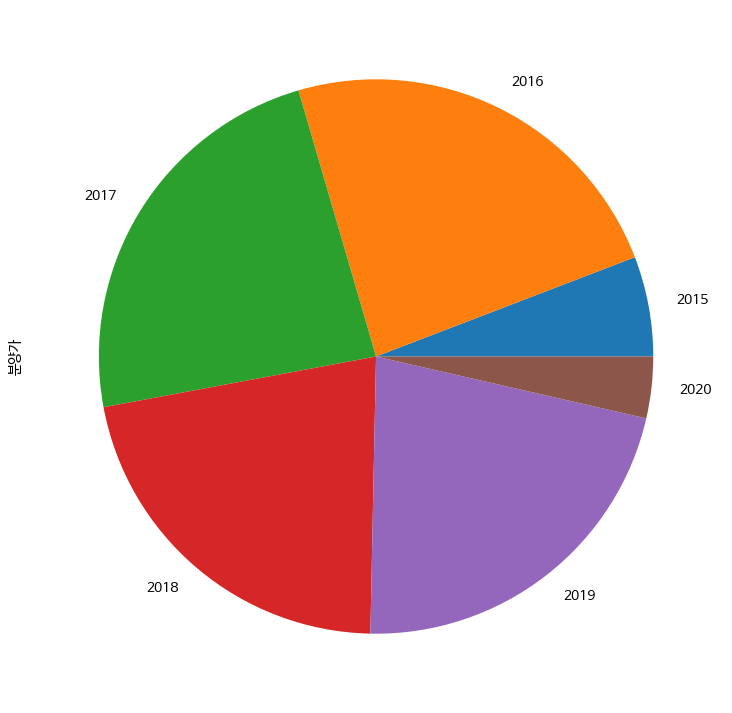

In [30]:
price_by_year.plot(kind="pie")

### scatter plot( 산점도 그래프 )
* 점으로 데이터를 표기
* x, y값을 넣어 줘야 합니다.(hexbin 과 같이)
* x축과 y축을 지정해 주면, 그에 맞는 **데이터 분포도**를 볼 수 있다.
* x, y축 모두 수치형 (numeric) 데이터만 지정가능 하다

<Axes: xlabel='월', ylabel='분양가'>

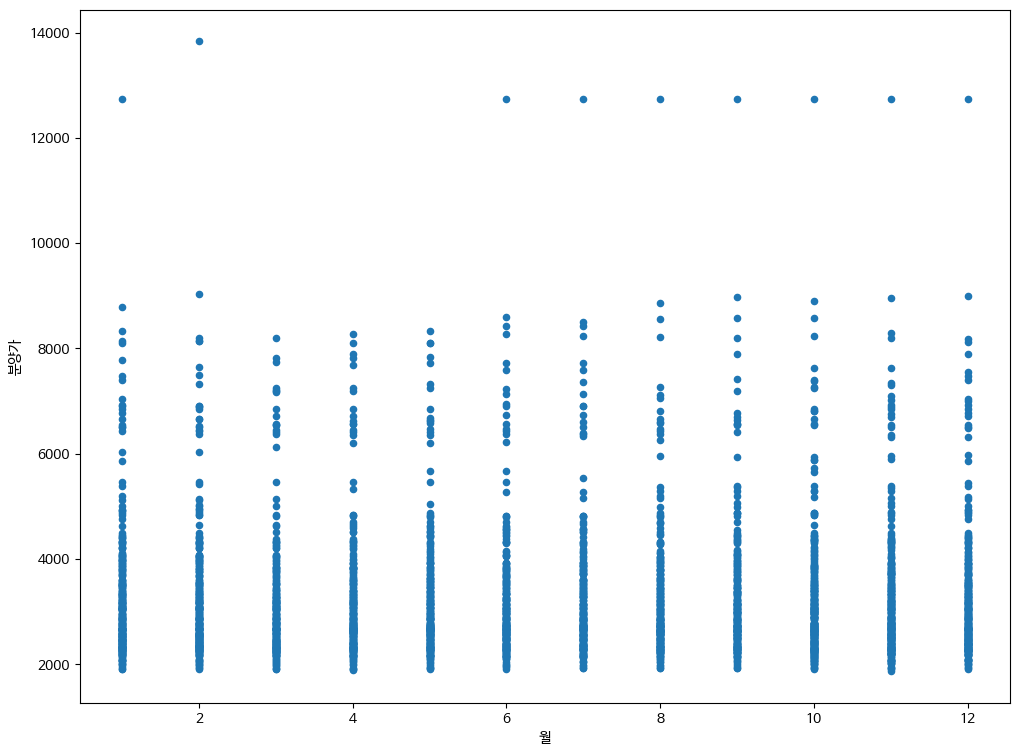

In [31]:
df.plot(x='월', y='분양가', kind='scatter')